# Моделирование случайных чисел

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Задание 1

In [7]:
def mid_square_method(init, digit, n = 10):
    if digit % 2 != 0: return

    r = init
    res = [r]
    mid_d = digit//2
    for i in range(n):
        r *= r
        digits = list(str(r))
        while len(digits) < digit:
            digits = ['0'] + digits
        r = int(''.join(digits[1:-1]))
        res.append(r)
    return res

In [50]:
res = mid_square_method(25, 4, 7)
res

[25, 62, 84, 5, 2, 0, 0, 0]

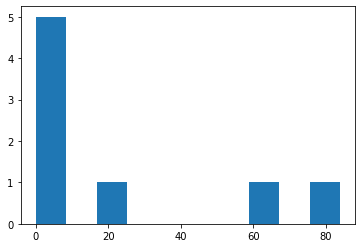

In [56]:
plt.hist(res)
plt.show()

## Задание №2

In [62]:
def linear_congruent_gauge_0_1(init, k, b, M, n):
    r = init
    unique = 0
    res = []
    for i in range(n):
        r = (k*r + b) % M
        if r/M not in res:
            unique += 1
        res.append(r/M)
    return res, unique

In [63]:
res = linear_congruent_gauge_0_1(3, 2, 1, 10, 12)
res

([0.7, 0.5, 0.1, 0.3, 0.7, 0.5, 0.1, 0.3, 0.7, 0.5, 0.1, 0.3], 4)

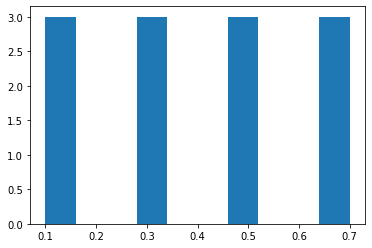

In [12]:
plt.hist(res[0])
plt.show()

In [64]:
def linear_congruent_gauge_a_b(init, k, b, M, n, a_param, b_param):
    r = init
    unique = 0
    res = []
    for i in range(n):
        r = (k*r + b) % M
        val = (1-r/M)*a_param + (r/M)*b_param
        if val not in res:
            unique += 1
        res.append(val)
    return res, unique

In [65]:
res = linear_congruent_gauge_a_b(3, 2, 1, 10, 10, 100, 200)
res

([170.0, 150.0, 110.0, 130.0, 170.0, 150.0, 110.0, 130.0, 170.0, 150.0], 4)

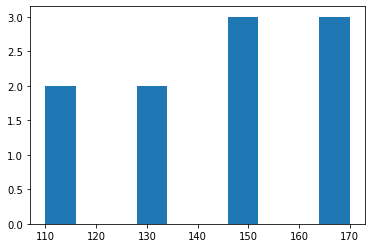

In [15]:
plt.hist(res[0])
plt.show()

## Задание №3

In [16]:
def exp_inverse_function_method(lambda_, n):
    return [-np.log(np.random.random())/lambda_ for _ in range(n)]

In [66]:
lambda_ = 3
res = exp_inverse_function_method(lambda_, 1000)
# res

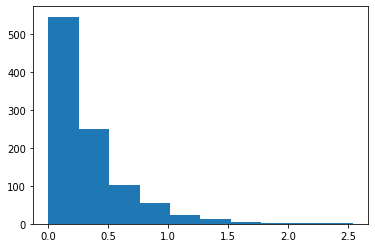

In [18]:
plt.hist(res)
plt.show()

__Математическое ожидание:__

In [19]:
m = sum(res)/len(res)
m

0.331958674573819

In [20]:
1/lambda_

0.3333333333333333

__Дисперсия:__

In [21]:
d = sum((x-m)**2 for x in res) / len(res)
d

0.1084274985543402

In [22]:
1/lambda_**2

0.1111111111111111

## Задание №4

In [23]:
def triangle_inverse_function_method(a, b, c, n):
    res = []
    for _ in range(n):
        y = np.random.random()
        if (0 < y < (c-a)/(b-a)):
            res.append(a + np.sqrt((b-a)*(c-a)*y))
        else:
            res.append(b - np.sqrt((b-a)*(b-c)*(1-y)))
    return res

In [24]:
a = 0
b = 1
c = 0.5
res = triangle_inverse_function_method(a, b, c, 10)
res

[0.665362711074063,
 0.846278850436264,
 0.6415340489755827,
 0.8172370846950494,
 0.3253426400006107,
 0.4105930190341688,
 0.44522507850150206,
 0.3909568588149366,
 0.9353402263154762,
 0.4911413238254251]

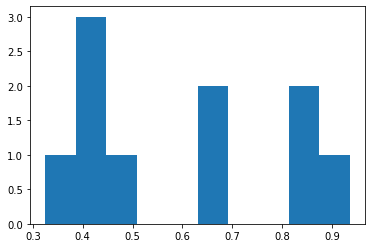

In [25]:
plt.hist(res)
plt.show()

__Математическое ожидание:__

In [26]:
m = sum(res)/len(res)
m

0.5969011841673079

In [27]:
(a+b+c)/3

0.5

__Дисперсия:__

In [28]:
d = sum((x-m)**2 for x in res) / len(res)
d

0.04170158175722251

In [29]:
(a**2+b**2+c**2-a*b-a*c-b*c)/18

0.041666666666666664

## Задание №5

In [30]:
def box_muller_transform(n):
    res = []
    for _ in range(n):
        v1, v2 = np.random.uniform(size=2)
        res.append(np.random.choice([np.cos(2*np.pi*v1)*np.sqrt(-2*np.log(v2)),
                                     np.sin(2*np.pi*v1)*np.sqrt(-2*np.log(v2))]))
    return res

In [31]:
res = box_muller_transform(1000)
# res

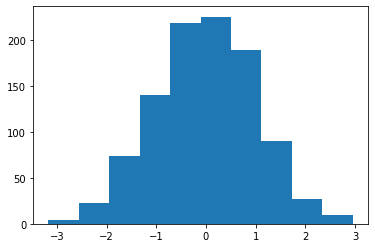

In [32]:
plt.hist(res)
plt.show()

In [33]:
def central_limit_theorem(n, m):
    return [np.sqrt(12/m)*np.sum(np.random.uniform(size=m))-m/2 for _ in range(n)]

In [34]:
res = central_limit_theorem(1000,10)
# res

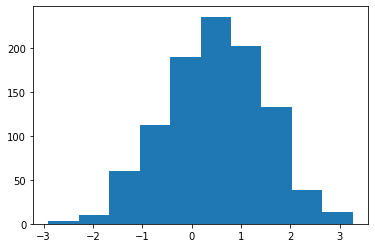

In [35]:
plt.hist(res)
plt.show()

## Задание №6

In [36]:
n = 1000

x = np.linspace(0,1,1000)
y = np.sin(np.pi*x)

x_rand = np.random.uniform(size=n)
y_rand = np.random.uniform(size=n)

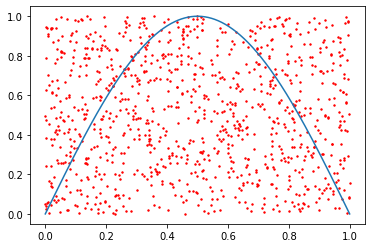

In [37]:
plt.scatter(x_rand,y_rand, s=2, c="r")
plt.plot(x, y)
plt.show()

In [38]:
def monte_carlo(n):
    x_rand = np.random.uniform(size=n)
    y_rand = np.random.uniform(size=n)
    count = 0
    for i in range(n):
        if y_rand[i] < np.sin(np.pi*x_rand[i]):
            count += 1
    return count/n

In [39]:
monte_carlo(10000)

0.631

In [40]:
points = [i for i in range(1, 10000, 50)]
res = np.array([monte_carlo(p) for p in points])
accuracy = 2/np.pi - res

[]

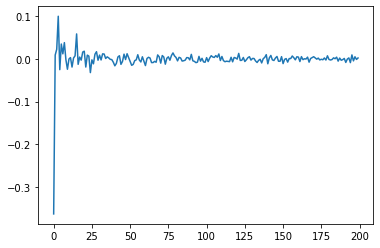

In [41]:
plt.plot(accuracy)
plt.plot()

## Задание №7

In [42]:
def coin(n):
    xs = np.random.uniform(size=n)
    return sum([0 if x < 0.5 else 1 for x in xs])/n

In [43]:
points = [i for i in range(1, 100000, 50)]
res = np.array([coin(p) for p in points])
accuracy = 0.5 - res

[]

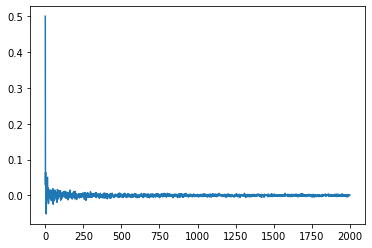

In [44]:
plt.plot(accuracy)
plt.plot()